In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from warnings import filterwarnings

#Deep learning & modules
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasRegressor
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

#data imputation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#Model Export
import joblib

filterwarnings("ignore")

In [3]:
#Our Goal is to predict the average case that appears that time

In [4]:
df = pd.read_csv("covid-data.csv")

In [5]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

,0
iso_code,0
continent,9956
location,0
date,0
total_cases,3033
...,...
human_development_index,30073
excess_mortality_cumulative_absolute,160630
excess_mortality_cumulative,160630
excess_mortality,160630


In [7]:
#SimpleImputation

In [8]:
#counting the unique
unique_continents = df["continent"].dropna().unique().tolist()
imputer = SimpleImputer(strategy="most_frequent")
df["continent"] = imputer.fit_transform(df[["continent"]]).ravel()
df["total_cases"] = imputer.fit_transform(df[["total_cases"]]).ravel()
df["human_development_index"] = imputer.fit_transform(df[["human_development_index"]]).ravel()
df["excess_mortality_cumulative_absolute"] = imputer.fit_transform(df[["excess_mortality_cumulative_absolute"]]).ravel()
df["excess_mortality_cumulative"] = imputer.fit_transform(df[["excess_mortality_cumulative"]]).ravel()
df["excess_mortality"] = imputer.fit_transform(df[["excess_mortality"]]).ravel()
df["excess_mortality_cumulative_per_million"] = imputer.fit_transform(df[["excess_mortality_cumulative_per_million"]]).ravel()

label = LabelEncoder()
df["iso_code"] = label.fit_transform(df[["iso_code"]])
df["continent"] = label.fit_transform(df[["continent"]])
df["location"] = label.fit_transform(df[["location"]])

df["date"] = pd.to_datetime(df["date"], format="mixed")

df.fillna(0)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,1,1,0,2020-02-24,5.0,5.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,-41.2,-0.89,-0.39,-230.933785
1,1,1,0,2020-02-25,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,-41.2,-0.89,-0.39,-230.933785
2,1,1,0,2020-02-26,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,-41.2,-0.89,-0.39,-230.933785
3,1,1,0,2020-02-27,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,-41.2,-0.89,-0.39,-230.933785
4,1,1,0,2020-02-28,5.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,37.746,0.5,64.83,0.511,-41.2,-0.89,-0.39,-230.933785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,237,0,237,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,-0.89,-0.39,-230.933785
166322,237,0,237,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,-0.89,-0.39,-230.933785
166323,237,0,237,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,-0.89,-0.39,-230.933785
166324,237,0,237,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,-0.89,-0.39,-230.933785


In [9]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,1,1,0,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,-41.2,-0.89,-0.39,-230.933785
1,1,1,0,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,-41.2,-0.89,-0.39,-230.933785
2,1,1,0,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,-41.2,-0.89,-0.39,-230.933785
3,1,1,0,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,-41.2,-0.89,-0.39,-230.933785
4,1,1,0,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,-41.2,-0.89,-0.39,-230.933785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,237,0,237,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,-0.89,-0.39,-230.933785
166322,237,0,237,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,-0.89,-0.39,-230.933785
166323,237,0,237,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,-0.89,-0.39,-230.933785
166324,237,0,237,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,-41.2,-0.89,-0.39,-230.933785


In [10]:
#Data Visualization

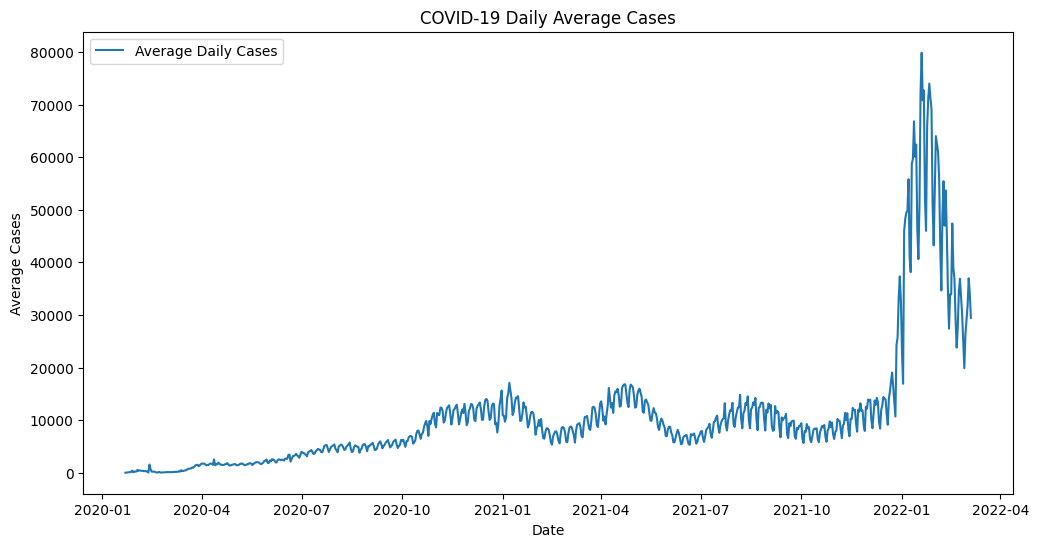

In [11]:
# Compute average new cases per day
daily_avg = df.groupby("date")["new_cases"].mean().reset_index()

#Plot
plt.figure(figsize=(12,6))
plt.plot(daily_avg["date"], daily_avg["new_cases"], label="Average Daily Cases")
plt.xlabel("Date")
plt.ylabel("Average Cases")
plt.title("COVID-19 Daily Average Cases")
plt.legend()
#plt.savefig("COVID-19 Daily Average Cases.png")
plt.show()

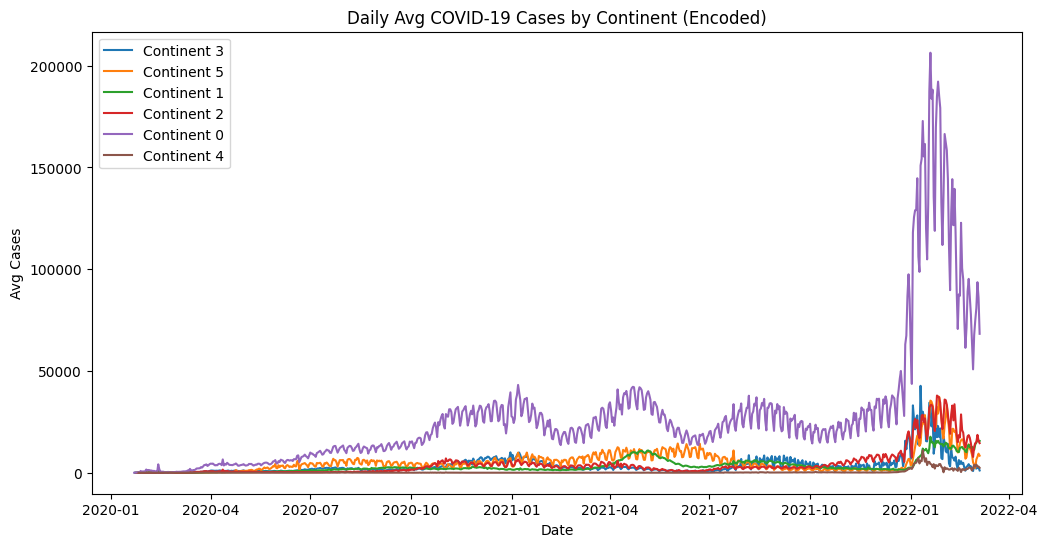

In [12]:
continent_avg = df.groupby(["date", "continent"])["new_cases"].mean().reset_index()

plt.figure(figsize=(12,6))
for c in continent_avg["continent"].unique():
    subset = continent_avg[continent_avg["continent"] == c]
    plt.plot(subset["date"], subset["new_cases"], label=f"Continent {c}")

plt.xlabel("Date")
plt.ylabel("Avg Cases")
plt.title("Daily Avg COVID-19 Cases by Continent (Encoded)")
plt.legend()
#plt.savefig("Daily Avg COVID-19 Cases by Continent (Encoded).png")
plt.show()

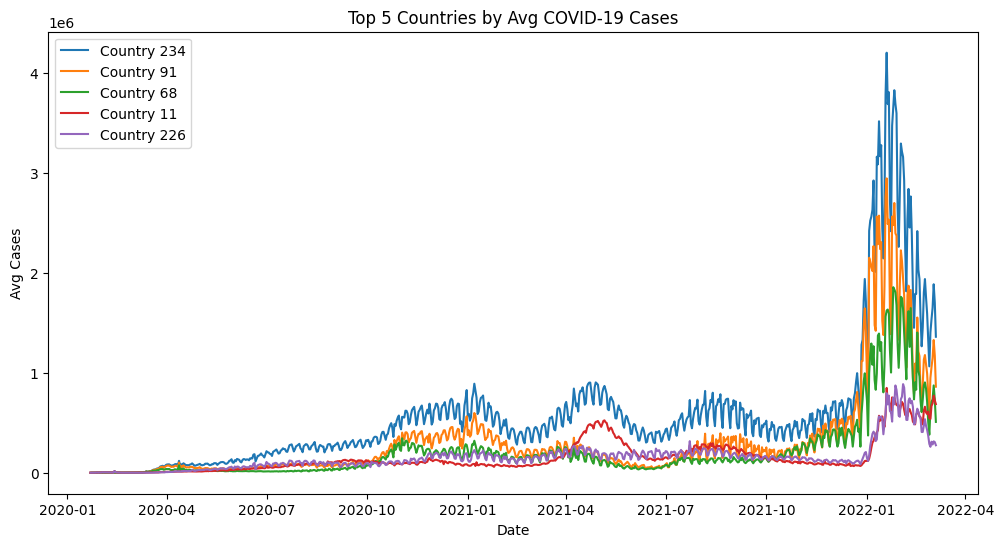

In [13]:
country_avg = df.groupby("location")["new_cases"].mean().reset_index()
top5 = country_avg.sort_values("new_cases", ascending=False).head(5)["location"]

subset = df[df["location"].isin(top5)]
subset_avg = subset.groupby(["date", "location"])["new_cases"].mean().reset_index()

plt.figure(figsize=(12,6))
for loc in top5:
    loc_data = subset_avg[subset_avg["location"] == loc]
    plt.plot(loc_data["date"], loc_data["new_cases"], label=f"Country {loc}")

plt.xlabel("Date")
plt.ylabel("Avg Cases")
plt.title("Top 5 Countries by Avg COVID-19 Cases")
plt.legend()
#plt.savefig("Top 5 Countries by Avg COVID-19 Cases.png")
plt.show()

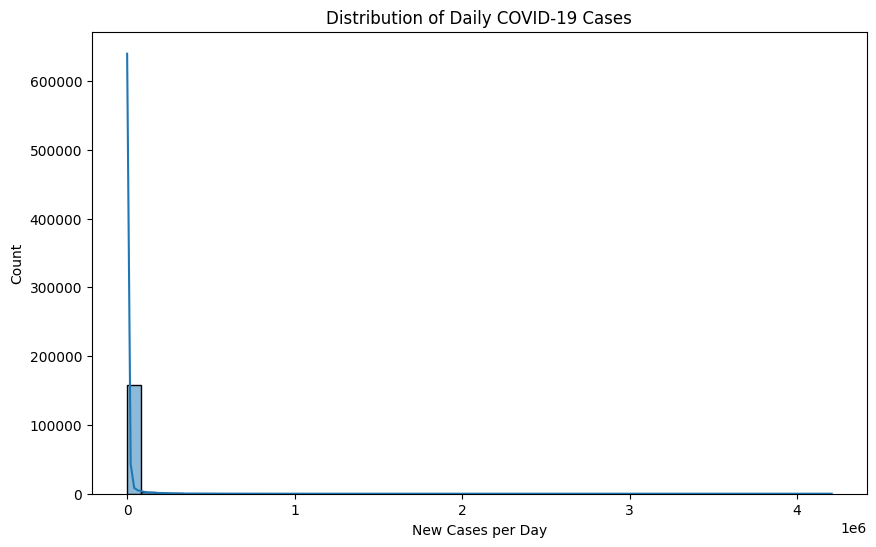

In [14]:
#Distribution of Daily Cases
plt.figure(figsize=(10,6))
sns.histplot(df["new_cases"], bins=50, kde=True)
plt.xlabel("New Cases per Day")
plt.title("Distribution of Daily COVID-19 Cases")
#plt.savefig("Distribution of Daily COVID-19 Cases.png")
plt.show()

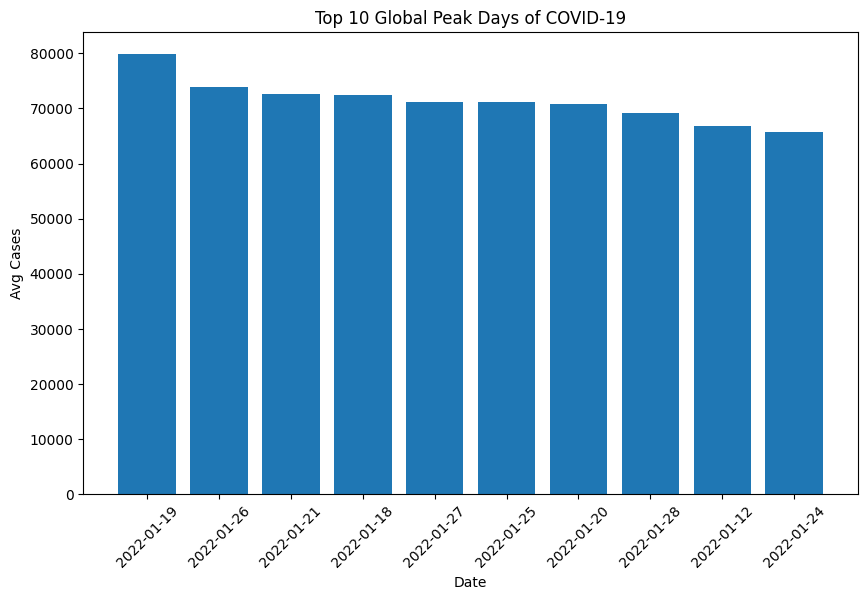

In [15]:
#Peaking Cases day
worst_days = daily_avg.sort_values("new_cases", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(worst_days["date"].dt.strftime("%Y-%m-%d"), worst_days["new_cases"])
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Avg Cases")
plt.title("Top 10 Global Peak Days of COVID-19")
#plt.savefig("Top 10 Global Peak Days of COVID-19.png")
plt.show()

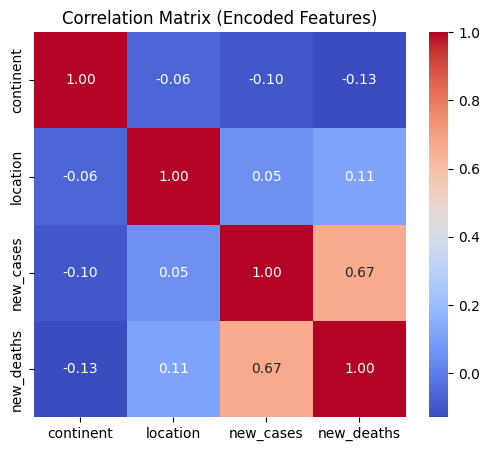

In [16]:
corr = df[["continent", "location", "new_cases", "new_deaths"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Encoded Features)")
#plt.savefig("Correlation Matrix (Encoded Features).png")
plt.show()

In [17]:
#Feature Engineering
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.isocalendar().week.astype(int)
df["dayofweek"] = df["date"].dt.dayofweek  # 0 = Monday
df["quarter"] = df["date"].dt.quarter
df["is_weekend"] = (df["dayofweek"] >= 5).astype(int)

#For Growth Features
#Lag features (cases/deaths from previous days)
for lag in [1, 7, 14]:
    df[f"new_cases_lag{lag}"] = df["new_cases"].shift(lag)
    df[f"new_deaths_lag{lag}"] = df["new_deaths"].shift(lag)

# Rolling averages (trend smoothing)
df["cases_7d_avg"] = df["new_cases"].rolling(7).mean()
df["deaths_7d_avg"] = df["new_deaths"].rolling(7).mean()

# Growth rate
df["case_growth_rate"] = df["new_cases"] / (df["new_cases_lag7"] + 1)

df["cases_per_million"] = df["new_cases"] / (df["population"] / 1e6)
df["deaths_per_million"] = df["new_deaths"] / (df["population"] / 1e6)

df["tests_per_thousand"] = df["total_tests"] / (df["population"] / 1e3)
df["vaccinated_ratio"] = df["people_vaccinated"] / df["population"]

df["cases_per_bed"] = df["new_cases"] / (df["hospital_beds_per_thousand"] * df["population"] / 1000 + 1)
df["deaths_per_bed"] = df["new_deaths"] / (df["hospital_beds_per_thousand"] * df["population"] / 1000 + 1)

df["smoker_ratio"] = (df["male_smokers"].fillna(0) + df["female_smokers"].fillna(0)) / 2

df["cases_x_hdi"] = df["new_cases"] * df["human_development_index"]
df["deaths_x_life_expectancy"] = df["new_deaths"] * df["life_expectancy"]

df["excess_mortality_gap"] = df["excess_mortality_cumulative_absolute"] - df["total_deaths"]
df["excess_mortality_ratio"] = df["excess_mortality_cumulative"] / (df["total_deaths"] + 1)

# Drop irrelevant identifiers
df = df.drop(columns=["iso_code"])

# Fill NaNs
df = df.fillna(0)

In [24]:
#Making of Model
X = df.drop(columns=["new_cases"])
y = df["new_cases"]

X = X.apply(pd.to_numeric, errors="coerce")

# Replace NaNs from coercion
X = X.fillna(0)

#Scaling The Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=True, random_state=42
)

model = Sequential([
        Dense(128, activation="relu", input_shape=(X.shape[1],)),
        Dropout(0.3),
        Dense(64, activation="relu"),
        Dropout(0.2),
        Dense(32, activation="relu"),
        Dense(1, activation="linear")  # Regression output
    ])

model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

loss, mae = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
4159/4159 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 3871964416.0000 - mae: 9043.2793 - val_loss: 330840320.0000 - val_mae: 3484.4194
Epoch 2/50
4159/4159 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 427151360.0000 - mae: 3798.3835 - val_loss: 177784848.0000 - val_mae: 2589.6602
Epoch 3/50
4159/4159 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 277333600.0000 - mae: 2990.1467 - val_loss: 142056720.0000 - val_mae: 2265.0154
Epoch 4/50
4159/4159 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 206673728.0000 - mae: 2630.9504 - val_loss: 98146480.0000 - val_mae: 2011.1924
Epoch 5/50
4159/4159 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 194992416.0000 - mae: 2501.4094 - val_loss: 86892432.0000 - val_mae: 1884.8099
Epoch 6/50
4159/4159 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 188142272.0000 - mae: 2375.1936 - val_loss: 74433144.0000 - val_mae: 1900.3625
Epoch 7/50
4159/4159 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 168151584.0000 - mae: 2350.1482 - val_loss: 56163416.0000 - val_mae: 1770.0426
Ep

In [25]:
#Model Metric Accuracy
print(f"Mean Absolute Error: {round(mae, 2)}")

Mean Absolute Error: 1085.78


In [30]:
#Model export to deploy via Flask
model.save("covid_model.h5", include_optimizer=False)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']